<a href="https://colab.research.google.com/github/mizzony/Data-Science--Cheat-Sheet/blob/master/final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#game Ispy
import random

class ISpyWordGuessing:
  '''I spy word guessing game let user guess a word that they can see or touch in the given place such as
  park, beach by provide the first letter to them, user can guess wrong 3 times'''

  def __init__(self):
        self.words = {
            1: {"category": "Road trip", "words": ["car", "truck", "gas station", "rest stop", "motel", "traffic light", "barricade"]},
            2: {"category": "School", "words": ["desk", "chair", "blackboard", "teacher", "student"]},
            3: {"category": "The park", "words": ["tree", "grass", "playground", "picnic table", "bench"]},
            4: {"category": "The beach", "words": ["sand", "water", "waves", "surfboard", "seashell"]}
        }

  def play(self):
        # Get input from user to pick the category of words
        while True:
            print("Please choose a word category you would like to play (something you can see/touch):")
            for key, value in self.words.items():
                print(f"{key}: {value['category']}")

            # Handling errors
            try:
                category = int(input("Enter the number of the category you want to play: "))
                if category not in self.words:
                    print("Error: Please enter a valid category number.")
                else:
                    break
            except ValueError:
                print("Error: Please enter a valid number.")

        # show first letter in a random word from the chosen category
        word_info = self.words[category]
        word = random.choice(word_info['words']).lower()
        first_letter = word[0]
        print(f"The first letter of the word is {first_letter}.")

        guesses_left = 3
        while guesses_left > 0:
            guess = input("Please guess the word: ").lower()

            # Check if the guess is correct
            if guess == word:
                print("Great work! You guessed the word correctly.")
                break
            else:
                guesses_left -= 1
                if guesses_left > 0:
                    print(f"Sorry, Wrong answer. You have {guesses_left} guesses left.")
                else:
                    print(f"Sorry, you've run out of guesses!!!. The correct word was {word} :).")
                    break

game = ISpyWordGuessing()
game.play()

# Ask user if they want to play again
while True:
    play_again = input("Would you like to play again? (y/n): ")
    if play_again.lower() == "y":
        game.play()
    else:
        print("Thank you for playing with us.")
        break


Please choose a word category you would like to play (something you can see/touch):
1: Road trip
2: School
3: The park
4: The beach
Enter the number of the category you want to play: 3
The first letter of the word is b.
Please guess the word: birds
Sorry, Wrong answer. You have 2 guesses left.
Please guess the word: bak
Sorry, Wrong answer. You have 1 guesses left.
Please guess the word: buo
Sorry, you've run out of guesses!!!. The correct word was bench :).
Would you like to play again? (y/n): n
Thank you for playing with us.


In [5]:
import random

class simplecalculator:
    def __init__(self):
        self.correct_answers = 0
        self.incorrect_answers = 0

    def generate_numbers(self):
        """Generates and returns a tuple of two or more positive integers."""
        return tuple(random.randint(1, 10) for _ in range(random.randint(2, 4)))

    def ask_question(self, numbers):
        operation = random.choice(["+", "-", "*", "/"])
        if operation == "+":
            result = sum(numbers)
            question = "How much is " + " + ".join(map(str, numbers)) + "?"
        elif operation == "-":
            result = numbers[0] - sum(numbers[1:])
            question = "How much is " + str(numbers[0]) + " - " + " - ".join(map(str, numbers[1:])) + "?"
        elif operation == "*":
            result = 1
            for num in numbers:
                result *= num
            question = "How much is " + " * ".join(map(str, numbers)) + "?"
        else:
            result = numbers[0]
            for num in numbers[1:]:
                if num == 0:
                    num = random.randint(1, 10)
                result /= num
            question = "How much is " + str(numbers[0]) + " / " + " / ".join(map(str, numbers[1:])) + " (rounded to two decimal places)?"

        return question, result

    def play(self):
        print("G'day mate! how are you. Let's play game")

        while True:
            try:
                operation_type = int(input("Please pick the type of operation:\n"
                                            "1. Addition(+)\n"
                                            "2. Subtraction(-)\n"
                                            "3. Multiplication(*)\n"
                                            "4. Division(/)\n"
                                            "5. Random mixture\n"
                                            "Enter your choice (1-5): "))
                #handling error first
                if operation_type < 1 or operation_type > 5:
                    print("Error: Operation type must be between 1 and 5.")
                    continue
                else:
                    break
            except ValueError:
                print("Error: Please enter a valid number (1-5).")

        while True:
            numbers = self.generate_numbers()
            question, answer = self.ask_question(numbers)
            print(question)

            try:
                user_answer = float(input("Your answer: "))
            except ValueError:
                print("Error: Please enter a valid number.")

            if round(user_answer, 2) == round(answer, 2):
                self.correct_answers += 1
                print('Nice work!')
            else:
                self.incorrect_answers += 1
                print('Wrong answer. Please try again')

            play_again = input("Do you want to play again? (yes/no): ")
            if play_again.lower() != "yes":
                break

        print("\nTotal exercises correct:", self.correct_answers)
        print("Total exercises incorrect:", self.incorrect_answers)

if __name__ == "__main__":
    game = simplecalculator()
    game.play()

G'day mate! how are you. Let's play game


KeyboardInterrupt: Interrupted by user

In [ ]:
import string
from collections import Counter
import itertools

class StringAnalyzer:
    def __init__(self, string_input):
        self.string_input = string_input
        self.duplicate_check = set()
        self.clean_string = self._clean_string(string_input)
        self.letter_counts = self._count_letters()

    def _clean_string(self, string_input):
        # Remove spaces and punctuation, convert to lowercase, and keep unique characters
        return ''.join(char.lower() for char in string_input if char.isalpha() and char.lower() not in self.duplicate_check and (self.duplicate_check.add(char.lower()) or True))

    def _count_letters(self):
        return Counter(self.string_input)

    def summarize_string(self):
        # Check if all letters of alphabet are present
        alphabet = set(string.ascii_lowercase)
        all_letters_present = all(letter in self.letter_counts for letter in alphabet)

        # Print letter frequencies
        print("Letter Frequencies:")
        for letter, count in sorted(self.letter_counts.items()):
            print(f"{letter}: {count}")

        # Print if all letters of alphabet are present
        print("All letters of the alphabet are present." if all_letters_present else "Not all letters of the alphabet are present.")

    def descriptive_statistics(self):
        # Calculate descriptive statistics
        total_letters = sum(self.letter_counts.values())
        unique_letters = len(self.letter_counts)
        most_common_letter, most_common_count = self.letter_counts.most_common(1)[0]
        least_common_letter, least_common_count = self.letter_counts.most_common()[-1]

        # Print descriptive statistics
        print("\nDescriptive Statistics:")
        print(f"Total letters: {total_letters}")
        print(f"Unique letters: {unique_letters}")
        print(f"Most common letter: {most_common_letter} ({most_common_count} occurrences)")
        print(f"Least common letter: {least_common_letter} ({least_common_count} occurrences)")

    def sort_and_remove_duplicates(self):
        # Sort letters and remove duplicates
        sorted_unique_letters = sorted(set(self.clean_string))

        # Print sorted letters without duplicates
        print("\nSorted Letters without Duplicates:")
        print(''.join(sorted_unique_letters))

    def generate_anagrams(self):
        # Generate anagrams of the cleaned string
        anagrams = set(''.join(perm) for perm in itertools.permutations(self.clean_string))

        # Print anagrams
        print("\nAnagrams:")
        for anagram in anagrams:
            print(anagram)

# Input string from the student
input_string = input("Enter a string: ")

# Create instance of StringAnalyzer
analyzer = StringAnalyzer(input_string)

# Perform tasks
analyzer.summarize_string()
analyzer.descriptive_statistics()
analyzer.sort_and_remove_duplicates()
analyzer.generate_anagrams()

Enter a string: school
Letter Frequencies:
c: 1
h: 1
l: 1
o: 2
s: 1
Not all letters of the alphabet are present.

Descriptive Statistics:
Total letters: 6
Unique letters: 5
Most common letter: o (2 occurrences)
Least common letter: l (1 occurrences)

Sorted Letters without Duplicates:
chlos

Anagrams:
hsloc
ohlcs
ohcls
clohs
slohc
lhcos
lcsho
hoslc
ocslh
loshc
ohcsl
sclho
solch
ohlsc
schol
hocls
hlocs
hslco
colsh
holsc
shclo
shloc
ocshl
hscol
lhocs
lcosh
shcol
locsh
csloh
hocsl
clhso
cslho
hcsol
oshlc
olshc
scloh
csohl
shlco
oclhs
slhco
olhcs
closh
chsol
lcohs
clsoh
hcols
lsohc
sholc
hsolc
lhsoc
scolh
solhc
ohscl
soclh
clsho
lscho
holcs
hcslo
hlcos
coslh
hlcso
scohl
oshcl
olchs
oclsh
csolh
lhsco
chols
lchso
lhcso
chlos
olhsc
slcho
cohls
oslch
ochsl
hlosc
hoscl
sohlc
colhs
coshl
hsclo
lohcs
cshol
lcsoh
olsch
chosl
ohslc
lshoc
lochs
cshlo
chlso
hclso
osclh
losch
hcosl
sloch
slcoh
shocl
lshco
lsoch
lohsc
lchos
hlsoc
lhosc
chslo
hclos
hsocl
slhoc
clhos
sohcl
oschl
cohsl
schlo
oslhc
ochls
s

Rating Frequencies:
1: 3
2: 4
3: 8
4: 2
5: 3

Response Statistics:
Minimum: 1
Maximum: 5
Range: 4
Mean: 2.9
Median: 3.0
Mode: 3
Variance: 1.568421052631579
Standard Deviation: 1.2523661815266247


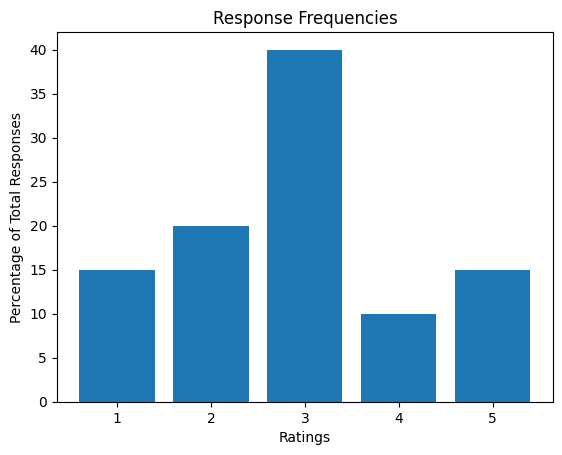

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean, median, mode, variance, stdev

class ProductRatings:
    def __init__(self, ratings):
        self.ratings = ratings
        self.rating_counts = Counter(ratings)

    def display_frequency(self):
        print("Rating Frequencies:")
        for rating, count in sorted(self.rating_counts.items()):
            print(f"{rating}: {count}")

    def display_statistics(self):
        print("\nResponse Statistics:")
        print(f"Minimum: {min(self.ratings)}")
        print(f"Maximum: {max(self.ratings)}")
        print(f"Range: {max(self.ratings) - min(self.ratings)}")
        print(f"Mean: {mean(self.ratings)}")
        print(f"Median: {median(self.ratings)}")
        print(f"Mode: {mode(self.ratings)}")
        print(f"Variance: {variance(self.ratings)}")
        print(f"Standard Deviation: {stdev(self.ratings)}")

    def display_bar_chart(self):
        ratings = sorted(self.rating_counts.keys())
        frequencies = [self.rating_counts[rating] for rating in ratings]
        total_responses = len(self.ratings)
        percentages = [(count / total_responses) * 100 for count in frequencies]

        plt.bar(ratings, percentages)
        plt.xlabel('Ratings')
        plt.ylabel('Percentage of Total Responses')
        plt.title('Response Frequencies')
        plt.show()

# Ratings provided by the student
ratings = [1, 2, 5, 4, 3, 5, 2, 1, 3, 3, 1, 4, 3, 3, 3, 2, 3, 3, 2, 5]

# Create an instance of ProductRatings
product_ratings = ProductRatings(ratings)

# Display frequency of each rating
product_ratings.display_frequency()

# Display response statistics
product_ratings.display_statistics()

# Display bar chart showing response frequencies
product_ratings.display_bar_chart()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean, median, mode, variance, stdev

class ProductRatings:
    def __init__(self, ratings):
        self.ratings = ratings
        self.rating_counts = Counter(ratings)

    def display_frequency(self):
        print("Rating Frequencies:")
        for rating, count in sorted(self.rating_counts.items()):
            print(f"{rating}: {count}")

    def display_statistics(self):
        print("\nResponse Statistics:")
        print(f"Minimum: {min(self.ratings)}")
        print(f"Maximum: {max(self.ratings)}")
        print(f"Range: {max(self.ratings) - min(self.ratings)}")
        print(f"Mean: {mean(self.ratings)}")
        print(f"Median: {median(self.ratings)}")
        print(f"Mode: {mode(self.ratings)}")
        print(f"Variance: {variance(self.ratings)}")
        print(f"Standard Deviation: {stdev(self.ratings)}")

    def display_bar_chart(self):
        ratings = sorted(self.rating_counts.keys())
        frequencies = [self.rating_counts[rating] for rating in ratings]
        total_responses = len(self.ratings)
        percentages = [(count / total_responses) * 100 for count in frequencies]

        plt.bar(ratings, percentages)
        plt.xlabel('Ratings')
        plt.ylabel('Percentage of Total Responses')
        plt.title('Response Frequencies')
        plt.show()

# Ratings provided by the student
#Initialize an empty list to store ratings
ratings = []

# Loop to collect 20 ratings from the user
for i in range(20):
    while True:
        try:
            rating = int(input(f"Enter rating {i+1} (1-5): "))
            if rating < 1 or rating > 5:
                raise ValueError("Rating must be between 1 and 5.")
            break
        except ValueError as e:
            print(e)
    ratings.append(rating)

# Create an instance of ProductRatings
product_ratings = ProductRatings(ratings)

# Display frequency of each rating
product_ratings.display_frequency()

# Display response statistics
product_ratings.display_statistics()

# Display bar chart showing response frequencies
product_ratings.display_bar_chart()


invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
